<a href="https://colab.research.google.com/github/trushnes/Web-and-Social-Computing/blob/main/assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IT752 - Web & Social Computing (Assignment - 03)**

**Submitted by: Tarushi Jat**

**Roll No.: 202IT029**


---




## **Libraries**

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import csv
from operator import itemgetter
from networkx.algorithms import community
import seaborn as sns

### **Necessary Methods**

In [ ]:
def plot_deg_dist(G):
	all_degree=dict(nx.degree(G)).values()
	
	unique_degree=list(set(all_degree))
	
	count_degree=[]
	all_degree=list(all_degree)
	
	for i in unique_degree:
		x=all_degree.count(i)
		count_degree.append(x)
	
	
	
	plt.plot(unique_degree,count_degree,'yo-')
	plt.xlabel('Degrees')
	plt.ylabel('No of nodes ')
	plt.title('Degree distribution of network')
	plt.show()

In [ ]:
def plot_deg_log(G):
	all_degree=dict(nx.degree(G)).values()
	
	unique_degree=list(set(all_degree))
	
	count_degree=[]
	all_degree=list(all_degree)
	
	for i in unique_degree:
		x=all_degree.count(i)
		count_degree.append(x)
	
	
	
	plt.loglog(unique_degree,count_degree,'yo-')
	plt.xlabel('Degrees')
	plt.ylabel('No of nodes ')
	plt.title('Log Degree distribution of network')
	plt.show()

# **1. Dataset : CA-GrQc Dataset**

### **1.1 Calculating Number of Nodes & Number of Edges**

In [ ]:
M = nx.read_edgelist('/content/drive/MyDrive/WebComputing/Assignment/Assignemnt-1/CA-GrQc.txt')

n = int(M.number_of_nodes())
m = int(M.number_of_edges())

print("Total number of nodes: ", n) 
print("Total number of edges: ", m)

Total number of nodes:  5242
Total number of edges:  14496


### **1.2 Calculation of pagerank score of each node in the network**

In [ ]:
pr=nx.pagerank(M,0.85,max_iter=1000)
print(pr)

{'3466': 0.00028791038987549284, '937': 0.00019009872909030309, '5233': 8.892996087934686e-05, '8579': 0.00019347739396011746, '10310': 0.0004533734660205237, '15931': 0.00035596515690039163, '17038': 0.0005581343689319254, '18720': 0.0001229699290307287, '19607': 0.0001573058715340158, '1854': 0.00036327993622890244, '4583': 0.00013115543713107026, '9572': 0.0011726979586704827, '10841': 0.00025722093312438186, '13056': 0.0003380219962708666, '14982': 8.707061431287568e-05, '16310': 0.0005885554290052198, '19640': 0.0004892533988425603, '23855': 0.0003356633833826179, '24372': 5.8309924939098945e-05, '24814': 0.0005700088043888379, '5052': 0.0009509092481648862, '899': 0.00010919120705223898, '1796': 7.970879937681778e-05, '2287': 0.0004733362503255548, '3096': 0.00037163248183780354, '3386': 0.000300371790531661, '4472': 0.00016733871946039995, '5346': 0.0007779104469472837, '5740': 5.651861463573426e-05, '6094': 0.00013558073366977494, '6376': 9.209894616887847e-05, '9124': 0.000964

### **1.3 Degree Calculation of each Node**

In [ ]:
deg = dict(M.degree())
node_degree = list(deg.values())
node_score = list(pr.values())
nodes = list(deg.keys())
print(nodes)
print(node_degree)
print(node_score)

['3466', '937', '5233', '8579', '10310', '15931', '17038', '18720', '19607', '1854', '4583', '9572', '10841', '13056', '14982', '16310', '19640', '23855', '24372', '24814', '5052', '899', '1796', '2287', '3096', '3386', '4472', '5346', '5740', '6094', '6376', '9124', '10235', '10427', '10597', '15159', '16148', '16741', '18235', '18549', '19297', '20511', '20595', '20613', '24371', '24559', '24731', '25102', '25271', '25396', '1658', '4822', '6864', '7689', '7926', '10268', '12971', '18600', '20421', '20886', '21048', '22393', '23186', '23214', '23298', '23945', '24939', '339', '624', '3731', '4743', '5407', '6610', '6700', '8045', '9099', '9639', '9785', '12141', '15184', '15784', '18719', '19870', '20532', '22527', '23576', '23577', '23649', '24199', '24293', '25201', '10243', '6774', '8049', '8053', '8517', '11964', '15538', '16694', '18648', '19423', '21012', '22457', '22691', '23452', '16174', '16470', '17822', '14265', '392', '2485', '2949', '3173', '3441', '3593', '3853', '3927'

### **1.4 Visualization of PageRank & Degree of Node**

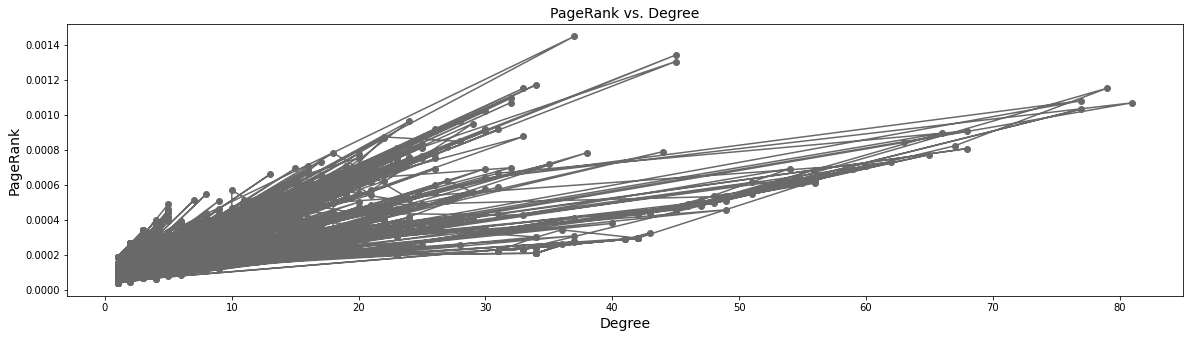

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(node_degree, node_score, color='dimgray', marker='o')
plt.title('PageRank vs. Degree', fontsize=14)
plt.xlabel('Degree', fontsize=14)
plt.ylabel('PageRank', fontsize=14)
plt.show()

### **Question - Part (a): Calculate and compare PageRank of the top 100 pages, and generate a ranked list based on the calculated scores.**


### **1.5 Extracting top 100 pages**

In [ ]:
pr = dict(sorted(pr.items(), key=lambda item: item[1], reverse=True))
top100 = list(pr.items())[:100]

In [ ]:
value = 1
top_100 =[]
for tup in top100:
  top_100.append([value]+list(tup))
  value = value + 1

In [ ]:
scores = [item[2] for item in top_100]
webpage = [item[1] for item in top_100]

### **1.6 Ranked List of top 100 pages based on calculated scores**

In [ ]:
from tabulate import tabulate
table = tabulate(top_100, headers=['Rank','Node', 'Pagerank Score'], tablefmt='orgtbl')
print(table)

|   Rank |   Node |   Pagerank Score |
|--------+--------+------------------|
|      1 |  14265 |      0.0014491   |
|      2 |  13801 |      0.00134243  |
|      3 |  13929 |      0.0013052   |
|      4 |   9572 |      0.0011727   |
|      5 |   2710 |      0.00115308  |
|      6 |  21281 |      0.0011525   |
|      7 |   7689 |      0.00109551  |
|      8 |  22691 |      0.0010817   |
|      9 |   6264 |      0.00107073  |
|     10 |  21012 |      0.00106946  |
|     11 |  12365 |      0.00103425  |
|     12 |    449 |      0.00102037  |
|     13 |   4952 |      0.000972954 |
|     14 |   9017 |      0.000965014 |
|     15 |   9124 |      0.000964293 |
|     16 |   5052 |      0.000950909 |
|     17 |  10762 |      0.000918959 |
|     18 |   7307 |      0.000918484 |
|     19 |   1488 |      0.000917661 |
|     20 |  19865 |      0.000909546 |
|     21 |   6610 |      0.000908619 |
|     22 |  14599 |      0.000907803 |
|     23 |  17655 |      0.000896778 |
|     24 |  23038 |      

### **Visualizing Top-100 pages and their PageRank Score**

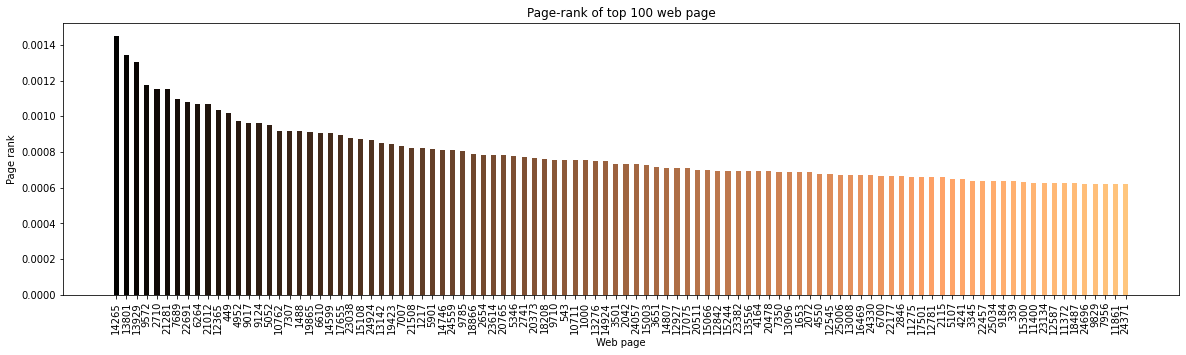

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(webpage, scores, width=0.5, color=sns.color_palette("copper", n_colors=len(webpage)))
plt.xticks(webpage, rotation = 90)

plt.ylabel("Page rank")
plt.xlabel("Web page")
plt.title("Page-rank of top 100 web page")
plt.show()

### **Question - Part (b): Which of the Web Pages have the highest and lowest PageRank?**

### **1.7 Web page with Lowest Page Rank**

In [ ]:
temp = min(pr.values()) 
res = [key for key in pr if pr[key] == temp] 

In [ ]:
print("Page with Lowest Page Rank Score : " + str(res)) 

Page with Lowest Page Rank Score : ['4382']


### **1.8 Webpage with Highest Page Rank**

In [ ]:
temp2 = max(pr.values()) 
res2 = [key2 for key2 in pr if pr[key2] == temp2] 
print("Page with Highest Page Rank Score : " + str(res2)) 

Page with Highest Page Rank Score : ['14265']


### **1.9 Scale Free Network**

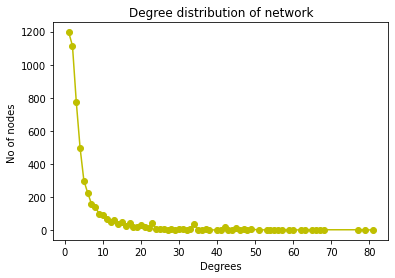

In [ ]:
plot_deg_dist(M)

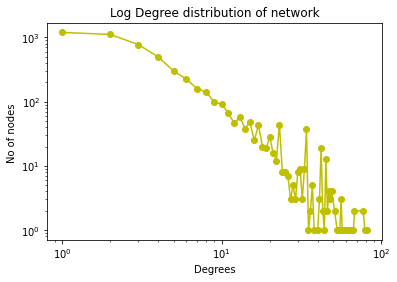

In [ ]:
plot_deg_log(M)

In [ ]:
print(nx.info(M))
print ("Average Clustering Coefficient", nx.average_clustering(M))

Name: 
Type: Graph
Number of nodes: 5242
Number of edges: 14496
Average degree:   5.5307
Average Clustering Coefficient 0.529635811052136


### **Question - Part(c): plots of the rank/score distribution**

### **1.10 Plotting Page Rank Score Distribution**

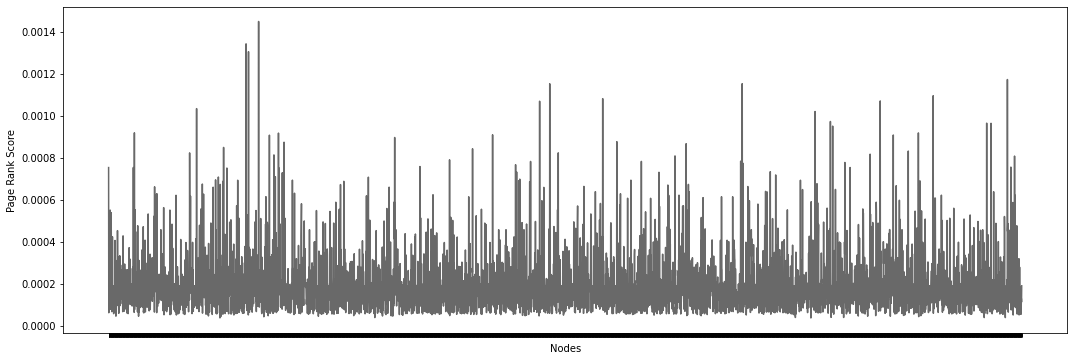

In [ ]:
import matplotlib.pylab as plt
lists = sorted(pr.items()) 
x, y = zip(*lists)
plt.figure(figsize=(18,6))
plt.plot(x,y,color='dimgrey')
plt.xticks(x, "")
plt.ylabel('Page Rank Score')
plt.xlabel('Nodes')
plt.show()

# **2. Dataset : email-Eu-core Dataset**

### **2.1 Calculating Number of Nodes & Number of Edges**

In [ ]:
M = nx.read_edgelist('/content/drive/MyDrive/WebComputing/Assignment/Assignemnt-1/email-Eu-core.txt')

n = int(M.number_of_nodes())
m = int(M.number_of_edges())

print("Total number of nodes: ", n) 
print("Total number of edges: ", m)

Total number of nodes:  1005
Total number of edges:  16706


### **2.2 Calculation of pagerank score of each node in the network**

In [ ]:
pr=nx.pagerank(M,0.4,max_iter=1000)
print(pr)

{'0': 0.0010582741646366091, '1': 0.0011696800025691682, '2': 0.001848884531385519, '3': 0.0012990612406463993, '4': 0.0016544516227495472, '5': 0.0032996822751076506, '6': 0.0021074969298257493, '7': 0.0014851825793055567, '8': 0.000984945196999867, '9': 0.0011218036339865733, '10': 0.001063049842647654, '11': 0.0014722681788509643, '12': 0.00147834163382004, '13': 0.002614626548905302, '14': 0.0015155992137865224, '15': 0.0012049138280781195, '16': 0.0012468848067906442, '17': 0.0016905913795287782, '18': 0.0011898770740971388, '19': 0.001326893074136819, '20': 0.001485342501556288, '21': 0.002356995291643105, '22': 0.000752428914004025, '23': 0.0014118569001186222, '24': 0.0012476483973925159, '25': 0.0008820750530321396, '26': 0.0009357965726872685, '27': 0.0014082808906077803, '28': 0.0016005097611515885, '29': 0.00115131831265656, '30': 0.001255959157612162, '31': 0.0010031642426642207, '32': 0.0009095353416673744, '33': 0.0009021915619661439, '34': 0.0008780180495884598, '35': 0

### **2.3 Degree Calculation of each Node**

In [ ]:
deg = dict(M.degree())
node_degree = list(deg.values())
node_score = list(pr.values())
nodes = list(deg.keys())
print(nodes)
print(node_degree)
print(node_score)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '15

### **2.4 Visualization of PageRank & Degree of Node**

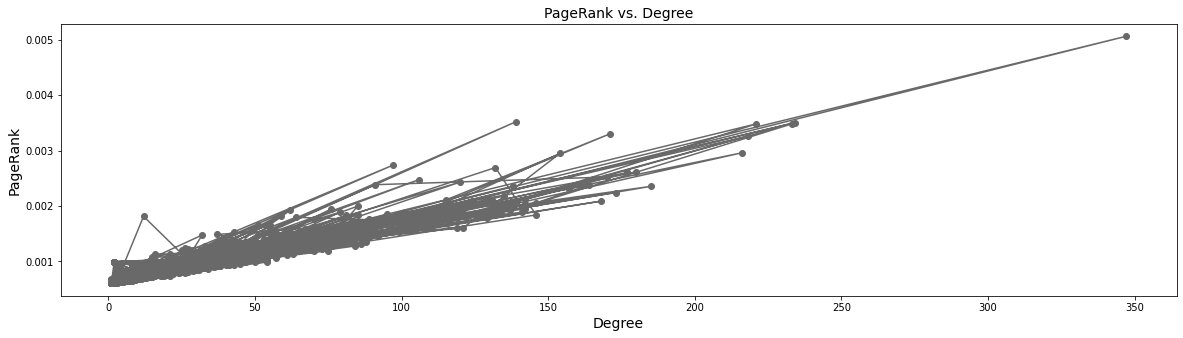

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(node_degree, node_score, color='dimgray', marker='o')
plt.title('PageRank vs. Degree', fontsize=14)
plt.xlabel('Degree', fontsize=14)
plt.ylabel('PageRank', fontsize=14)
plt.show()

### **Question - Part (a): Calculate and compare PageRank of the top 100 pages, and generate a ranked list based on the calculated scores.**


### **2.5 Extracting top 100 pages**

In [ ]:
pr = dict(sorted(pr.items(), key=lambda item: item[1], reverse=True))
top100 = list(pr.items())[:100]

In [ ]:
value = 1
top_100 =[]
for tup in top100:
  top_100.append([value]+list(tup))
  value = value + 1

In [ ]:
scores = [item[2] for item in top_100]
webpage = [item[1] for item in top_100]

### **2.6 Ranked List of top 100 pages based on calculated scores**

In [ ]:
from tabulate import tabulate
table = tabulate(top_100, headers=['Rank','Node', 'Pagerank Score'], tablefmt='orgtbl')
print(table)

|   Rank |   Node |   Pagerank Score |
|--------+--------+------------------|
|      1 |    160 |       0.00505865 |
|      2 |    377 |       0.00351913 |
|      3 |    121 |       0.00350089 |
|      4 |    107 |       0.00348118 |
|      5 |     82 |       0.00347807 |
|      6 |      5 |       0.00329968 |
|      7 |     86 |       0.00325888 |
|      8 |     62 |       0.00295837 |
|      9 |    211 |       0.00294862 |
|     10 |    971 |       0.00273548 |
|     11 |     84 |       0.00269287 |
|     12 |     13 |       0.00261463 |
|     13 |    166 |       0.00260489 |
|     14 |     64 |       0.00252219 |
|     15 |    411 |       0.00247602 |
|     16 |     96 |       0.00243108 |
|     17 |     65 |       0.00238359 |
|     18 |    129 |       0.00237872 |
|     19 |     21 |       0.002357   |
|     20 |    434 |       0.00235389 |
|     21 |    533 |       0.00231488 |
|     22 |    183 |       0.00224026 |
|     23 |    333 |       0.00217998 |
|     24 |    106 |      

### **2.7 Visualizing Top-100 pages and their PageRank Score**

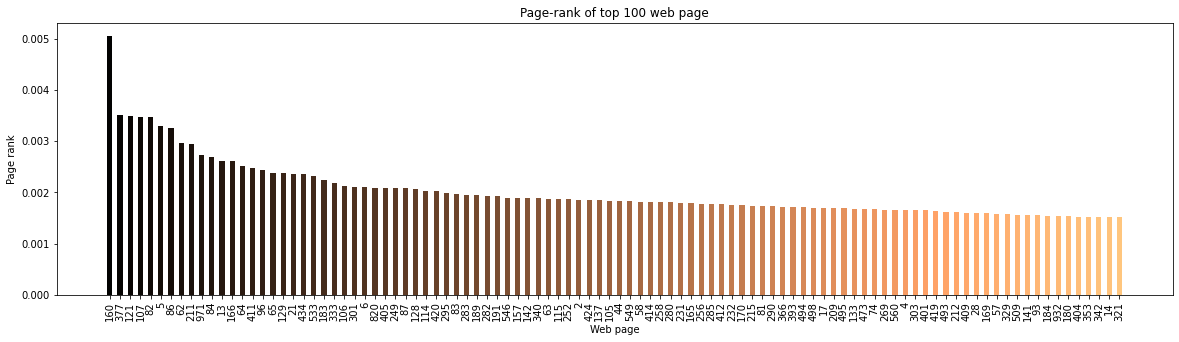

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(webpage, scores, width=0.5, color=sns.color_palette("copper", n_colors=len(webpage)))
plt.xticks(webpage, rotation = 90)

plt.ylabel("Page rank")
plt.xlabel("Web page")
plt.title("Page-rank of top 100 web page")
plt.show()

### **Question - Part (b): Which of the Web Pages have the highest and lowest PageRank?**

### **2.8 Web page with Lowest Page Rank**

In [ ]:
temp = min(pr.values()) 
res = [key for key in pr if pr[key] == temp] 

In [ ]:
print("Page with Lowest Page Rank Score : " + str(res)) 

Page with Lowest Page Rank Score : ['853']


### **2.9 Webpage with Highest Page Rank**

In [ ]:
temp2 = max(pr.values()) 
res2 = [key2 for key2 in pr if pr[key2] == temp2] 
print("Page with Highest Page Rank Score : " + str(res2)) 

Page with Highest Page Rank Score : ['160']


### **2.10 Scale Free Network**

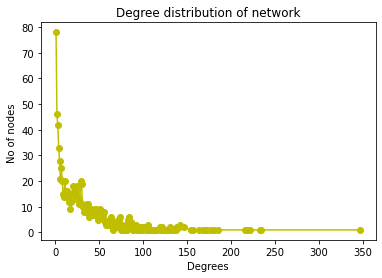

In [ ]:
plot_deg_dist(M)

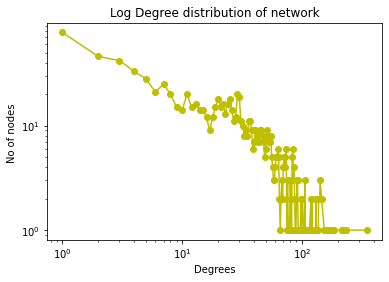

In [ ]:
plot_deg_log(M)

In [ ]:
print(nx.info(M))
print ("Average Clustering Coefficient", nx.average_clustering(M))

Name: 
Type: Graph
Number of nodes: 1005
Number of edges: 16706
Average degree:  33.2458
Average Clustering Coefficient 0.3993549664221539


### **Question - Part(c): plots of the rank/score distribution**

### **2.11 Plotting Page Rank Score Distribution**

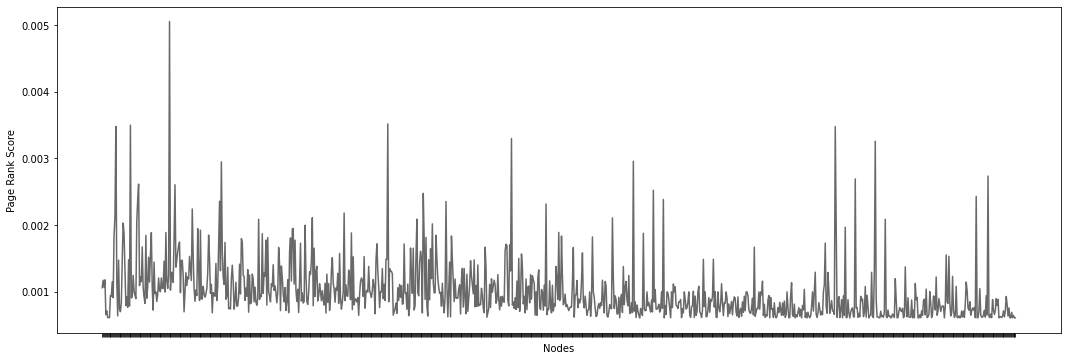

In [ ]:
import matplotlib.pylab as plt
lists = sorted(pr.items()) 
x, y = zip(*lists)
plt.figure(figsize=(18,6))
plt.plot(x,y,color='dimgrey')
plt.xticks(x, "")
plt.ylabel('Page Rank Score')
plt.xlabel('Nodes')
plt.show()

# **3. Dataset : soc-sign-bitcoin**

### **3.1 Calculating Number of Nodes & Number of Edges**

In [ ]:
M = nx.read_edgelist('/content/drive/MyDrive/WebComputing/Assignment/Assignemnt-1/soc-sign-bitcoin.txt')

n = int(M.number_of_nodes())
m = int(M.number_of_edges())

print("Total number of nodes: ", n) 
print("Total number of edges: ", m)

Total number of nodes:  5881
Total number of edges:  21492


### **3.2 Calculation of pagerank score of each node in the network**

In [ ]:
pr=nx.pagerank(M,0.4,max_iter=1000)
print(pr)

{'6': 0.0004160222338936658, '2': 0.0004611200512749037, '5': 0.00011373805459229972, '1': 0.0024134847467929027, '15': 0.00021983626930781772, '4': 0.0007710624954816695, '3': 0.0002448079720125919, '13': 0.0022427240788989115, '16': 0.00010618694623189158, '10': 0.00014912021766392379, '7': 0.00301003529082425, '21': 0.0003398135166453359, '20': 0.00015055076384757154, '8': 0.00011716278028259879, '17': 0.00027029060356971164, '23': 0.0003922004645922826, '25': 0.0008096401448145654, '26': 0.00030992901238454426, '28': 0.00018697215622616946, '29': 0.000530407965594371, '31': 0.00011021458779410767, '32': 0.00012554212580113435, '34': 0.00011486621045356764, '35': 0.019964115124279765, '36': 0.0007082231554147041, '37': 0.00020502418553980118, '44': 0.00011631099233079196, '39': 0.00030352529124126013, '45': 0.0002569640403385129, '19': 0.00016687125009806348, '46': 0.00010966511500935108, '47': 0.00011070272961871737, '51': 0.00040633607309245975, '52': 0.00010695535612663698, '53':

### **3.3 Degree Calculation of each Node**

In [ ]:
deg = dict(M.degree())
node_degree = list(deg.values())
node_score = list(pr.values())
nodes = list(deg.keys())
print(nodes)
print(node_degree)
print(node_score)

['6', '2', '5', '1', '15', '4', '3', '13', '16', '10', '7', '21', '20', '8', '17', '23', '25', '26', '28', '29', '31', '32', '34', '35', '36', '37', '44', '39', '45', '19', '46', '47', '51', '52', '53', '54', '41', '55', '57', '61', '65', '56', '66', '69', '70', '71', '72', '74', '75', '68', '64', '76', '77', '78', '60', '79', '80', '81', '62', '83', '104', '86', '87', '89', '94', '95', '96', '97', '99', '88', '101', '100', '103', '105', '106', '107', '108', '109', '110', '111', '112', '115', '114', '119', '122', '127', '129', '116', '131', '132', '133', '113', '125', '135', '134', '137', '138', '140', '141', '139', '142', '143', '144', '145', '146', '147', '148', '93', '149', '150', '152', '153', '154', '155', '156', '157', '158', '160', '161', '162', '163', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '180', '181', '159', '182', '183', '184', '185', '186', '187', '33', '188', '189', '190', '191', '192', '193', '194', '195', 

### **3.4 Visualization of PageRank & Degree of Node**

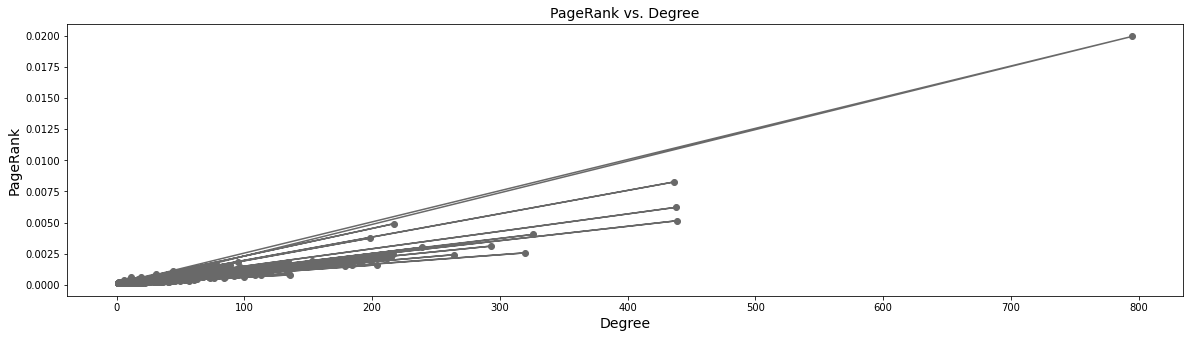

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(node_degree, node_score, color='dimgray', marker='o')
plt.title('PageRank vs. Degree', fontsize=14)
plt.xlabel('Degree', fontsize=14)
plt.ylabel('PageRank', fontsize=14)
plt.show()

### **Question - Part (a): Calculate and compare PageRank of the top 100 pages, and generate a ranked list based on the calculated scores.**


### **3.5 Extracting top 100 pages**

In [ ]:
pr = dict(sorted(pr.items(), key=lambda item: item[1], reverse=True))
top100 = list(pr.items())[:100]

In [ ]:
value = 1
top_100 =[]
for tup in top100:
  top_100.append([value]+list(tup))
  value = value + 1

In [ ]:
scores = [item[2] for item in top_100]
webpage = [item[1] for item in top_100]

### **3.6 Ranked List of top 100 pages based on calculated scores**

In [ ]:
from tabulate import tabulate
table = tabulate(top_100, headers=['Rank','Node', 'Pagerank Score'], tablefmt='orgtbl')
print(table)

|   Rank |   Node |   Pagerank Score |
|--------+--------+------------------|
|      1 |     35 |      0.0199641   |
|      2 |   2125 |      0.00825667  |
|      3 |   2642 |      0.00622455  |
|      4 |   1810 |      0.00514806  |
|      5 |   3129 |      0.00490398  |
|      6 |   2028 |      0.00404358  |
|      7 |   1953 |      0.0037396   |
|      8 |   4172 |      0.0031032   |
|      9 |      7 |      0.00301004  |
|     10 |    905 |      0.00256315  |
|     11 |   1018 |      0.00244065  |
|     12 |      1 |      0.00241348  |
|     13 |   2296 |      0.00226564  |
|     14 |     13 |      0.00224272  |
|     15 |   3988 |      0.00218878  |
|     16 |   4197 |      0.00216015  |
|     17 |   2388 |      0.00211865  |
|     18 |   2067 |      0.00189354  |
|     19 |   1386 |      0.00188576  |
|     20 |   2266 |      0.00187742  |
|     21 |   3735 |      0.00184347  |
|     22 |    257 |      0.00184325  |
|     23 |   1396 |      0.00173267  |
|     24 |    546 |      

### **3.7 Visualizing Top-100 pages and their PageRank Score**

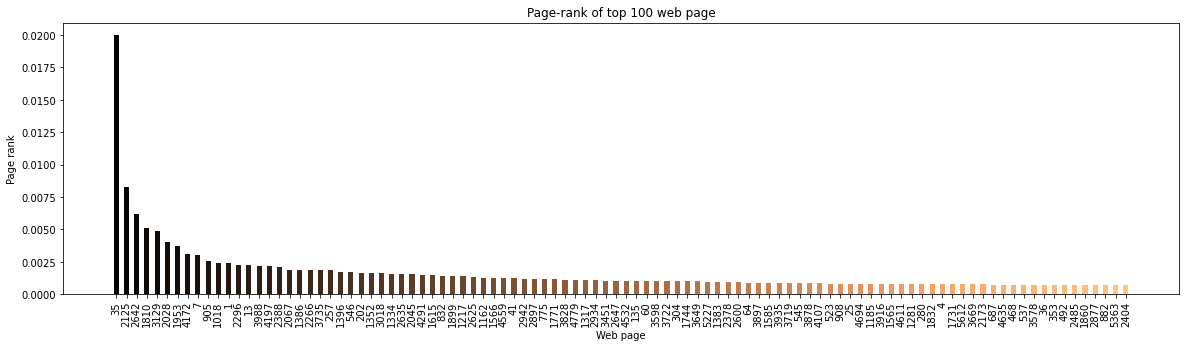

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(webpage, scores, width=0.5, color=sns.color_palette("copper", n_colors=len(webpage)))
plt.xticks(webpage, rotation = 90)

plt.ylabel("Page rank")
plt.xlabel("Web page")
plt.title("Page-rank of top 100 web page")
plt.show()

### **Question - Part (b): Which of the Web Pages have the highest and lowest PageRank?**

### **3.8 Web page with Lowest Page Rank**

In [ ]:
temp = min(pr.values()) 
res = [key for key in pr if pr[key] == temp] 

In [ ]:
print("Page with Lowest Page Rank Score : " + str(res)) 

Page with Lowest Page Rank Score : ['4704']


### **3.9 Webpage with Highest Page Rank**

In [ ]:
temp2 = max(pr.values()) 
res2 = [key2 for key2 in pr if pr[key2] == temp2] 
print("Page with Highest Page Rank Score : " + str(res2)) 

Page with Highest Page Rank Score : ['35']


### **3.10 Scale Free Network**

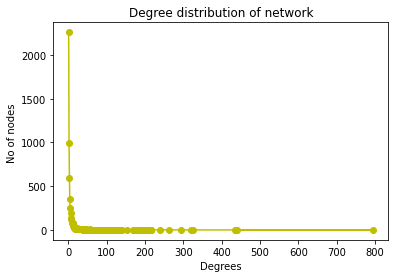

In [ ]:
plot_deg_dist(M)

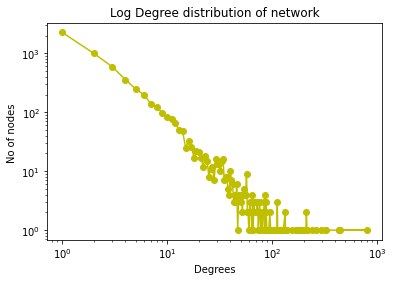

In [ ]:
plot_deg_log(M)

In [ ]:
print(nx.info(M))
print ("Average Clustering Coefficient", nx.average_clustering(M))

Name: 
Type: Graph
Number of nodes: 5881
Number of edges: 21492
Average degree:   7.3090
Average Clustering Coefficient 0.17750449405289517


### **Question - Part(c): plots of the rank/score distribution**

### **3.11 Plotting Page Rank Score Distribution**

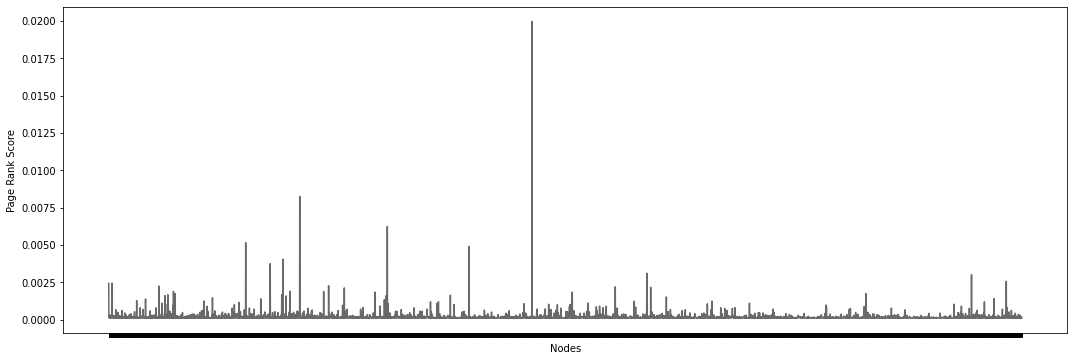

In [ ]:
import matplotlib.pylab as plt
lists = sorted(pr.items()) 
x, y = zip(*lists)
plt.figure(figsize=(18,6))
plt.plot(x,y,color='dimgrey')
plt.xticks(x,"")
plt.ylabel('Page Rank Score')
plt.xlabel('Nodes')
plt.show()


### **End.**
---

